In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mat_mul(A, v):
    """
    This function helps us to multipy two given matirces
    """
    r1,c1 = A.shape
    r2, c2 = v.shape
    assert(c1==r2), "The matrix size has to match"
    
    # Creates a empty matrix of size r1*c2
    res = np.zeros((r1, c2))
    
    # Iterates over every row and every column of A and v matrices respectively
    for i in range(r1):
        for j in range(c2):
            for k in range(c1):
                res[i][j] += A[i][k]*v[k][j]
    return(res)

In [3]:
def det (A):
    """
    Computes the determinant of a 2*2 or 3*3 square matrix
    """
    r, c = A.shape
    assert(r == c), "Matrix has to be square"
    det = 0
    if (r == 2):
        return(A[0][0]*A[1][1] - A[0][1]*A[1][0])
    
    for i in range(r):
        minor1 = 1
        minor2 = 1
        for j in range (c):
            minor1 *= A[j][(j+i)%r]
            minor2 *= A[r-j-1][(j+i)%r]   
        det += (minor1-minor2)
    return(det)

In [16]:
def inv(A):
    """
    Calculates the Inverse of a matrix if it exists
    """
    r, c = A.shape
    assert (r==c), "Matrix has to be square"
    assert(det(A) != 0), "Matrix has to be non-singular"
    
    # Creating an augumented matrix
    augumentedMatrix = np.zeros((r, c*2))
    
    for i in range(r):
        for j in range(c):
            augumentedMatrix[i][j] = A[i][j]
        augumentedMatrix[i][j+i+1] = 1
        
    # Changes the row which haves a diagonal element zero
    for i in range(r):
        if augumentedMatrix[i][i] == 0:
            augumentedMatrix[i], augumentedMatrix[(i + 1) % r] = np.copy(augumentedMatrix[(i + 1) % r]), np.copy(augumentedMatrix[i])
    
    # Applying Gauss Jordan method to find the inverse
    for i in range(r):
        k = i
        k_count = 0
        while (k_count<r):
            if (i==k and augumentedMatrix[i][i] != 0):
                div = augumentedMatrix[i][i]
                for j in range(2*c):
                    augumentedMatrix[i][j] = augumentedMatrix[i][j]/div
            else:
                mul = augumentedMatrix[k][i]
                for j in range(2*c):
                    augumentedMatrix[k][j] -= (mul*augumentedMatrix[i][j]) 
            k_count += 1
            k = (k+1)%r
    
    # Seperates the inverse from the augumented matrix
    res = augumentedMatrix[:, c:]
    return(res)

In [17]:
def plot_vector (vector, text = "", colour = "k", legend=True):
    """
    This function helps us to plot any given vector from origin (0, 0)
    """
    x = np.linspace(0, vector[0])
    y = np.linspace(0, vector[1])
    plt.plot(x,y, colour, label=text.strip())
    if (legend):
        plt.legend()
    plt.annotate(
        text,
        xy=(vector[0], vector[1]), xycoords='data',
        xytext=(vector[0]+2, vector[1]+2), textcoords='offset points', color=colour)

In [18]:
def diagonalise(A, P, x):
    """
    Diagonalize the the given matrix into a basis form
    """
    eig_val, eig_vec = np.linalg.eig(A)
    
    # Computes a matrix D with diagonal values as eigen values
    D = np.zeros((len(A), len(A)))
    for i in range(len(A)):
        D[i][i] = eig_val[i]
    
    P_inv = inv(P)            
    
    # transforms the given vector x to basis coordinates
    new_basis = mat_mul(P_inv, x)
    # stretches the given vector x in basis coordinates
    stretch = mat_mul(D, new_basis)
    # transforms the given vector x to standard coordinates
    old_basis = mat_mul(P, stretch)
    
    
    return ([new_basis, stretch, old_basis])

In [19]:
A = np.array([[4, 2], 
             [1, 5]])

B = np.array([[2, 1],
             [-1, 1]])


v = np.array([[2], 
             [1]])

new_basis, stretch, old_basis = diagonalise(A, B, v)
print('new basis coordinate:\n', new_basis)
print('\nstretched coordinate: \n', stretch)
print('\nold basis coordinate: \n', old_basis)

new basis coordinate:
 [[0.33333333]
 [1.33333333]]

stretched coordinate: 
 [[1.]
 [8.]]

old basis coordinate: 
 [[10.]
 [ 7.]]


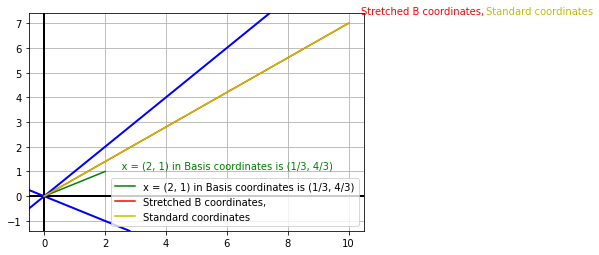

In [20]:
plt.axhline(0, color='black', linewidth=2)
plt.axvline(0, color='black', linewidth=2)
plt.axline((0, 0), (1, 1), linewidth=2, color='b')
plt.axline((2, -1), (0, 0), linewidth=2, color='b')
plt.grid(True)


plot_vector(mat_mul(B, new_basis), "    x = (2, 1) in Basis coordinates is (1/3, 4/3)", 'g')
plot_vector(mat_mul(B, stretch), "Stretched B coordinates,", 'r')
plot_vector(old_basis, "                                        Standard coordinates",'y')